##  Nearest Neighbors Classification

这个还是监督式的算法。

最近邻。思路简单，算法复杂。计算所有样本点之间的距离，然后挑选几个固定的样本点，然后把剩下的样本绑定到这几个固定的样本上。那么如何绑定呢？通过计算其他样本点和固定样本点之间的距离。把距离最小的绑定在一起。有一个问题，每个样本点应该绑多少个样本呢？这个参数需要我们自己定义。这就是著名的K近邻，而这个k就是我们决定的需要绑定的样本个数。这里我们只说k近邻，不讨论radius-based neighbor learning。

因为需要计算所有样本的距离，所以开销很大。所以衍生出两个重要的算法，Ball Tree 和 KD Tree来加速模型的计算。

既然绑定到不同的点上，那么如何判断是属于哪个类别呢？因为是监督式的模型，所以是通过投票的方式。如果多数的族认为是1，那么就是1.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

[ Choice of Nearest Neighbors Algorithm](http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

In [ ]:
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                                             leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                                             n_jobs=1, **kwargs)

参数：
1. n_neighbors：绑定的个数
2. weights：每个样本点的权重，如何认为全是一样的，公平的，就设为uniform，为1。还可以设为distance，按照距离来设置权重，距离越近，权重越大。 
3. n_jobs：建议为-1
4. algorithm： {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}. brute，暴力法。kd_tree,如果A和B很远，B和C很近，我们就知道了A和C很远，于是就不用计算A和C的距离了。这个算法很常用。虽然把算法的复杂度减小了，从DN^2变为了DNlog(N)，但并没有对维度做更好的处理，所以说如果维度过大的话，这个算法消耗还是很大的。所以有人提出了ball_tree.这个是针对kd_tree的改进。维度增大的时候，也能保持合理的效率。但也有一些缺陷。sklearn能帮我们最懂选择哪个算法。这个知识点很重要，kd_tree是k近邻算法的灵魂，如果没有的话
5. leaf_size：叶子节点数量。默认30一般不用调整。如果越大，构建树的时间就会快一些。原理是叶子节点越多，存储的样本就越少。
6. metric：距离的度量。
7. p：p=1是曼哈顿距离。p=2是欧式距离。默认是欧式距离。

Automatically created module for IPython interactive environment


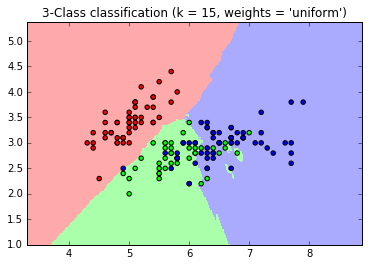

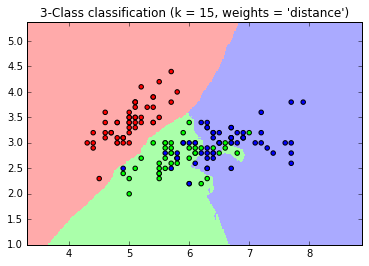

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh
    
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))



In [3]:
NearestNeighbors?

### Unsupervised Nearest Neighbors 

无监督学习，没有target，即y。

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [4]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

# 聚类分析

聚类大部分都是计算距离的。

Clustering of unlabeled data can be performed with the module sklearn.cluster.

Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

最常用的三个算法
Three main clusting methods:
1. k-means：最常用
2. Hierarchical clustering：层次的，可解释性强。但是不常用
3. DBSCAN

## K-means

思想很简单。为了算出你制定的几个类别。比如你制定了5个类别，每个类别里有一堆样本，每个类别里有一个中心点，每个样本到这个中心点都有一个距离。它希望的是，每一个类里面，所有样本到这个中心点的距离之和达到最小。下面公式里的x_j就是当前类里的每个样本，u_i就是这个类里的中心点。那么这个中心点是怎么来的？这就是K-means的一个核心。其实这个中心点是通过不断迭代更新得来的，每一次都不一样。至于是怎么更新的，可以看下面的中文链接。

这里有一个trick. 用k-means的时候，再加上一个PCA，即降维的话，效果会更好。因为kmeans是计算样本点之间的距离的，不需要所有的维度，只需要大概的维度就可以了。不用想监督学习那样特别精确。

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

![image](http://scikit-learn.org/stable/_images/math/1886f2c69775746ac7b6c1cdd88c53c676839015.png)

[K-means中文讲解](http://www.cnblogs.com/jerrylead/archive/2011/04/06/2006910.html)

**Three Steps:**

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

**Attention:**

K means++ 的提出是专门用来针对质心点初始化的。下面有论文。现在用k-means基本都是用的++。

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

[k-means++: The advantages of careful seeding](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, 
                             n_jobs=1, algorithm='auto')

参数：
n_clusters：最重要的就是这个参数。自定义。
max_iter：如果1万次采用收敛的话，那么适当写一个就可以，不用特别大。

In [10]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.20s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.14s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.02s    71820   0.673   0.715   0.693   0.567   0.670    0.150
_______________________________________________________________________________


结果里：

inertia就是上面公式里样本点到质心点的距离之和。另外上面用PCA的方法是直接把init改成了PCA，这样没什么效果。下面的才是正确用法。先PCA处理数据，在用kmeans计算距离。

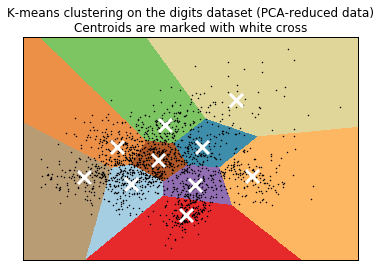

In [12]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
kmeans.labels_
# 能查看每个样本属于那一类别

array([7, 9, 7, ..., 7, 7, 0], dtype=int32)

In [14]:
np.c_[xx.ravel(), yy.ravel()]

array([[ -7.9972533 ,  -7.67530852],
       [ -7.9772533 ,  -7.67530852],
       [ -7.9572533 ,  -7.67530852],
       ..., 
       [ 10.9227467 ,  10.84469148],
       [ 10.9427467 ,  10.84469148],
       [ 10.9627467 ,  10.84469148]])

In [15]:
kmeans.transform(np.c_[xx.ravel(), yy.ravel()])
# 将输入的X放入到类里边去。不是把类别的标签加载到数据的最后一列去，这个和监督式的不一样
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# 上面的数据np.c_[xx.ravel(), yy.ravel()]在新的类别空间里就变成了下面这个样子

array([[  8.80057774,  13.77622597,  13.80429868, ...,  11.54665975,
         17.93406947,  11.27753601],
       [  8.78667011,  13.76156044,  13.79267949, ...,  11.52984549,
         17.92060503,  11.26397942],
       [  8.77278601,  13.74690837,  13.78107953, ...,  11.51304141,
         17.9071528 ,  11.25044205],
       ..., 
       [ 17.6795739 ,  12.71024904,  13.1072627 , ...,  15.3435939 ,
          8.63167748,  15.22319982],
       [ 17.6940537 ,  12.72412569,  13.12388971, ...,  15.35560677,
          8.64753682,  15.23801256],
       [ 17.70854424,  12.73801863,  13.14052611, ...,  15.36763628,
          8.6634133 ,  15.25283713]])

## Hierarchical clustering

这个是树结构。比如说有10万个样本，这就是有10万个类。然后通过计算距离两两之间合并起来，merge的思想。这个距离的计算就稍复杂一些了。另外一种思想是10万个样本是一个类，然后split不算拆开。

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

涉及到三个算法。最常用的是ward。

1. Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.  距离达到最小的时候
2. Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.每两个样本之间的距离达到最大。
3. Average linkage minimizes the average of the distances between all observations of pairs of clusters. 平均的距离。

Automatically created module for IPython interactive environment
Computing embedding
Done.
ward : 8.71s
average : 8.74s
complete : 8.69s


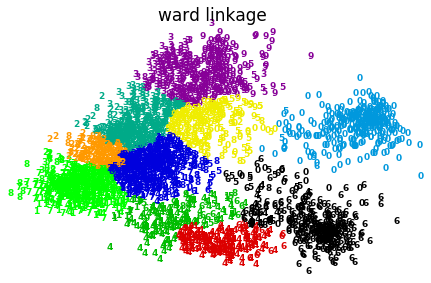

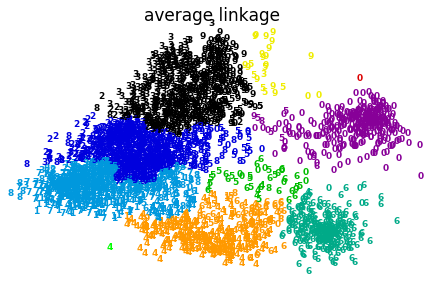

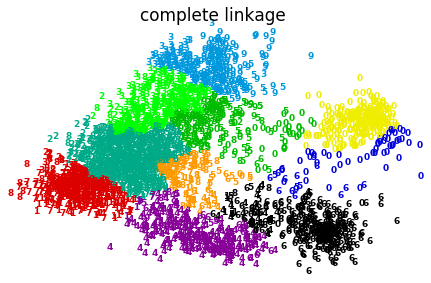

In [13]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [ ]:
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=Memory(cachedir=None), 
                                              connectivity=None, compute_full_tree='auto', 
                                              linkage='ward', pooling_func=<function mean>)

参数：

affinity：衡量距离的。默认是欧式距离。如果 linkage='ward' 用的是ward，只能使用欧氏距离。

In [14]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster.hierarchical:

class AgglomerativeClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int, default=2
 |      The number of clusters to find.
 |  
 |  connectivity : array-like or callable, optional
 |      Connectivity matrix. Defines for each sample the neighboring
 |      samples following a given structure of the data.
 |      This can be a connectivity matrix itself or a callable that transforms
 |      the data into a connectivity matrix, such as derived from
 |      kneighbors_graph. Default is None, i.e, the
 |      hierarchical clustering algorithm is unstructured.
 |  
 |  affinity : string or callable, default: "euclidean"
 |      Metric used to co

## DBSCAN

这个是通过密度来对数据做聚类的。有两个重要的参数，min_samples 和 eps。min_samples，你要想生成一个类，这个类里最少得有多少个样本。eps，是最小距离。不想上面的kmeans，我们不需要制定多少个类，只需要制定每个类多少样本和最小距离即可。这样的话就能自动地来帮你分类。如果Higher min_samples or lower eps 就会让当前类的密度变得比较高。

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

In [16]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

###########################################
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


/Users/xu/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


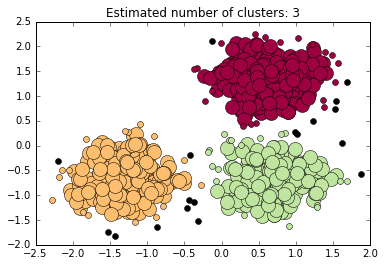

In [17]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

kmeans计算的是所有样本的距离，如果有异常值，outliers，这样在衡量距离，以及计算质心点的时候，就会有问题。所以kmeans的一个大缺点就是对异常值极为敏感。如果异常值很多，训练出来的效果会很差。

反观DBSCAN，虽然设置参数多，但能很好地规避异常值。比如上面图里的黑色点就是outliers，不符合任何类的要求。这个是它一个很大的优点，但还是不如kmeans来得快。

一些tricks：

1. 我们最常用的是kmeans，接下来是hierarchical, DBSCAN. 可以考虑高斯混合。
2. 一般我们用聚类算法只是用来探索数据，大概看一下数据分布。应用的模型永远是监督式的模型
3. kmeans或者说聚类算法一般用的比较少。如果不是做图像的东西，做聚类没什么太大意义。

评估：

我们希望类里样本间的距离达到最小。但是除了这个，还有一个，就是我们希望类别之间的距离最大。所以说评估的话就这种两个，一个是类里的距离，一个是类别间的距离。